In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# import latest updated file
instacart_final = pd.read_pickle(r'C:\Users\User\Documents\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_merged.pkl')

In [7]:
path = r'C:\Users\User\Documents\Instacart Basket Analysis'

In [10]:
instacart_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [12]:
instacart_final.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [14]:
instacart_final.shape

(32404859, 34)

In [16]:
instacart_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

# step 2: Address security implications

In [18]:
# dropping first name & last name columns due to PII
instacart_final.drop(['first_name', 'last_name'], axis=1, inplace = True)

In [19]:
# check columns after drop
instacart_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge'],
      dtype='object')

# step 3: Create a regional segmentation of the data

In [22]:
# setup region columns
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [24]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [26]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [28]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [30]:
# create a region columns
instacart_final.loc[instacart_final['state'].isin(northeast_region), 'region'] = 'Northeast'

In [32]:
instacart_final.loc[instacart_final['state'].isin(midwest_region), 'region'] = 'Midwest'

In [34]:
instacart_final.loc[instacart_final['state'].isin(south_region), 'region'] = 'South'

In [36]:
instacart_final.loc[instacart_final['state'].isin(west_region), 'region'] = 'West'

In [38]:
# checking region division
instacart_final['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [40]:
# Creating a crosstab between region and spender flag to compare spending habits in different U.S. regions
region_spending_crosstab = pd.crosstab(instacart_final['region'], instacart_final['spender_flag'], dropna = False)

In [42]:
# check the table
region_spending_crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Spending habits are very similar between regions when looking at the proportions of customers in each region.
The greatest proportion of 'High spender' customers was 2.10% in the South, whereas the lowest proportion of 'High spender' customers was 1.93%  in the northeast.

# step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data & export this sample.

In [44]:
# exclude customers who has max order less than 5
instacart_final.loc[instacart_final['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [46]:
# keep customers whose max order greater than or equal to 5
instacart_final.loc[instacart_final['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [48]:
# check exclusion flag frequency
instacart_final['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [50]:
# Check exclusion flag using crosstab
exclusion_flag_crosstab = pd.crosstab(instacart_final['exclusion_flag'], instacart_final['max_order'], dropna = False)

In [52]:
# export for excel viewing
exclusion_flag_crosstab.to_clipboard()

In [54]:
exclusion_flag_crosstab.head(10)

max_order,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
exclusion_flag,,,,,,,,,,,,,,,,,,,,,
Exclude,5,6,686741,753543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Keep,0,0,0,0,793140,811396,803979,811843,810213,773124,...,48328,59378,55127,50333,52600,59877,40453,44949,44587,1171333


exclusion flag is verified, all rows where max_order is less than 5 marked exclude else keep

In [56]:
# Create sample without 'exclude' rows called ords_prods
instacart_final = instacart_final[instacart_final['exclusion_flag'] == 'Keep']

In [58]:
instacart_final.shape

(30964564, 34)

Since the number of rows in the dataset matches the frequency of "Keep" entries in the "Exclusion_Flag" column,
we can confidently conclude that this sample contains only the relevant data, excluding any rows related to customers who have made fewer than 5 orders.
This ensures that the dataset focuses solely on customers who are active users of the platform, providing a more accurate representation for analysis.

In [60]:
# Export Sample
instacart_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_sample.pkl'))

# step 5: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents, also use the “orders_day_of_week” and “order_hour_of_day” columns 

based on age, the age categories are subjective, but based on standard ranges. Young adult =< 25, Adult 25-45,Older Adult 45-65 Senior 65+

In [62]:
# Creating age profiling variable
instacart_final.loc[instacart_final['age']<=25, 'age_group']='Young Adult'

In [64]:
instacart_final.loc[(instacart_final['age']>25)&(instacart_final['age']<45), 'age_group']='Adult'

In [66]:
instacart_final.loc[(instacart_final['age']>=45)&(instacart_final['age']<65), 'age_group']='Older Adult'

In [68]:
instacart_final.loc[instacart_final['age']>=65, 'age_group']='Senior'

In [70]:
# Check frequency of age_group
instacart_final['age_group'].value_counts(dropna = False)

age_group
Older Adult    9690051
Adult          9214451
Senior         8195544
Young Adult    3864518
Name: count, dtype: int64

In [72]:
# Aggregate for age group usage frequency
instacart_final.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    10.815262  0.0  30.0
Older Adult              10.825714  0.0  30.0
Senior                   10.791788  0.0  30.0
Young Adult              10.799071  0.0  30.0

In [74]:
# Aggregate for age group expenditure
instacart_final.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.786432  1.0  99999.0
Older Adult  12.112030  1.0  99999.0
Senior       11.757768  1.0  99999.0
Young Adult  12.209359  1.0  99999.0

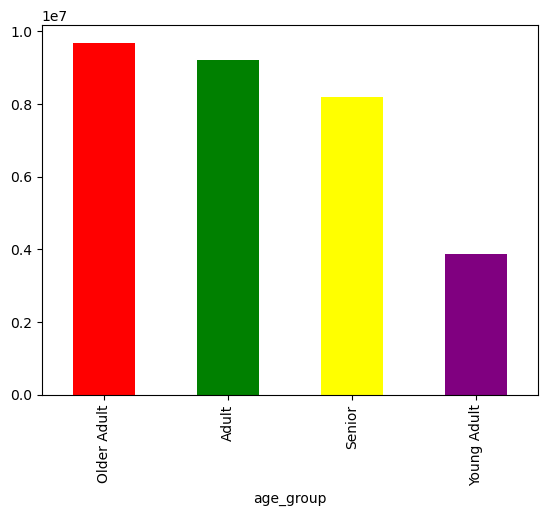

In [76]:
# Age profile visualization
bar=instacart_final['age_group'].value_counts().plot.bar(color =['red', 'green', 'yellow', 'purple'])

In [78]:
# export the figure
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroup.png'))

Income: Categorize customers into income categories: low, middle, & high income groups based on standard considerations of US incomes

In [80]:
instacart_final.loc[instacart_final['income'] <= 50000, 'income_group'] = 'Low'

In [82]:
instacart_final.loc[(instacart_final['income'] > 50000) & (instacart_final['income'] <= 100000), 'income_group'] = 'Middle'

In [84]:
instacart_final.loc[instacart_final['income'] > 100000, 'income_group'] = 'High'

In [86]:
# Check frequency of income_group
instacart_final['income_group'].value_counts(dropna = False)

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

In [88]:
# Aggregate for income group order frequency
instacart_final.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
High                      10.769663  0.0  30.0
Low                       11.175808  0.0  30.0
Middle                    10.762110  0.0  30.0

In [90]:
# Aggregate for income group expenditure
instacart_final.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
income_group                         
High          16.461733  1.0  99999.0
Low            6.707347  1.0     25.0
Middle         8.442726  1.0  99999.0

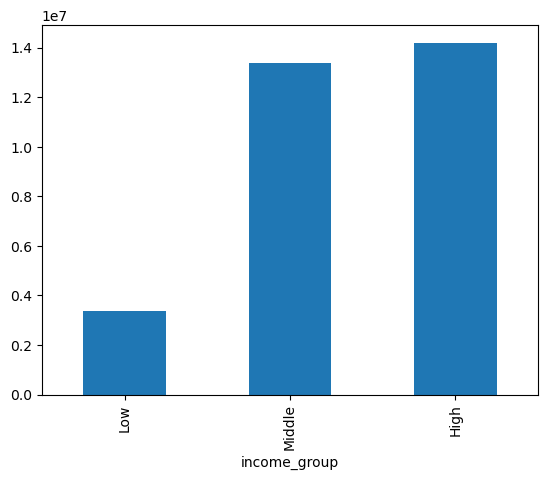

In [92]:
# Income profile visualization
bar_2 = instacart_final['income_group'].value_counts().sort_values().plot.bar()

In [94]:
# Export Bar Chart 
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomegroup.png'))

Number of Dependants: Divide data into customers with dependents and customers without dependents

In [96]:
instacart_final.loc[instacart_final['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [98]:
instacart_final.loc[instacart_final['n_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

In [100]:
#Check data
instacart_final['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

In [102]:
# Aggregate for dependent group order frequency
instacart_final.groupby('dependants_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependants_flag                                  
Has Dependants               10.816416  0.0  30.0
No Dependants                10.791951  0.0  30.0

In [104]:
# Aggregate for dependent group expenditure
instacart_final.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependants_flag                         
Has Dependants   11.877157  1.0  99999.0
No Dependants    12.102657  1.0  99999.0

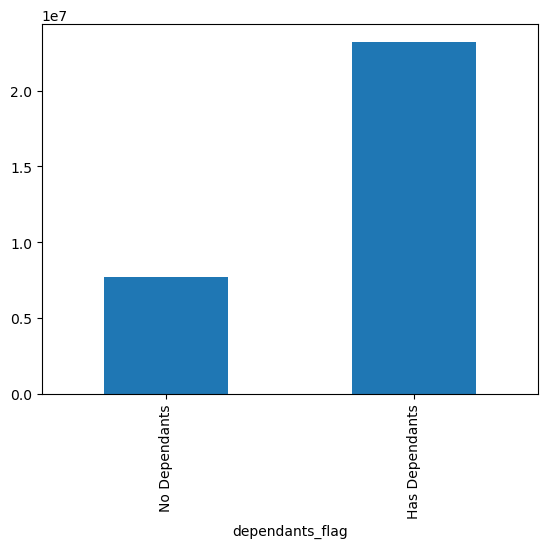

In [106]:
# Number of dependent group profile visualization
bar_3 = instacart_final['dependants_flag'].value_counts().sort_values().plot.bar()

In [108]:
# Export Bar Chart
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependentgroup.png'))

# step 6: Visualizations to show distributions of profiles

In [110]:
# Create a different table and take relevant columns
group_table = instacart_final[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [112]:
group_table.head(10)

,user_id,age_group,income_group,dependants_flag,region,loyalty_flag
0,138,Senior,Low,Has Dependants,Midwest,Regular customer
1,138,Senior,Low,Has Dependants,Midwest,Regular customer
2,709,Senior,High,Has Dependants,Northeast,New customer
5,777,Older Adult,Middle,Has Dependants,West,Regular customer
6,825,Young Adult,Low,Has Dependants,South,New customer
7,910,Senior,Low,No Dependants,South,Regular customer
8,1052,Senior,High,Has Dependants,West,Regular customer
9,1052,Senior,High,Has Dependants,West,Regular customer
10,1379,Older Adult,Low,Has Dependants,West,New customer
11,1480,Young Adult,Low,Has Dependants,South,Loyal customer


In [114]:
# Create age_group counts table
age_group_counts = group_table['age_group'].value_counts()

Text(0.5, 1.0, 'Instacart Distribution of Customers by Age Group')

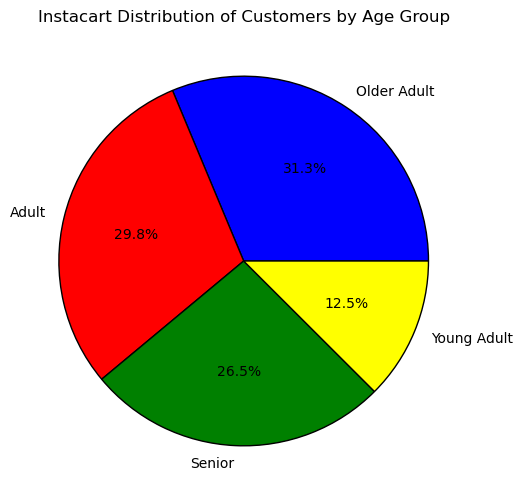

In [116]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts,
labels = age_group_counts.index,
autopct='%.1f%%',
colors = ['blue', 'red', 'green', 'yellow'],
wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Age Group')

In [118]:
# export pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') 

<Figure size 640x480 with 0 Axes>

In [120]:
# Create a table of income_group counts
income_group_counts = group_table['income_group'].value_counts()

Text(0.5, 1.0, 'Instacart Distribution of Customers by Income Group')

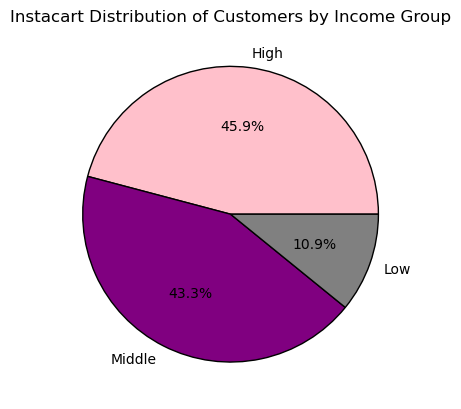

In [122]:
plt.pie(income_group_counts,
labels = income_group_counts.index,
autopct='%.1f%%',
colors = ['pink', 'purple', 'grey'],
wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')

In [124]:
# export figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

In [126]:
# create a table of dependents_flag counts
dependants_flag_counts = group_table['dependants_flag'].value_counts()

Text(0.5, 1.0, 'Instacart Customers with Dependents vs without Dependents')

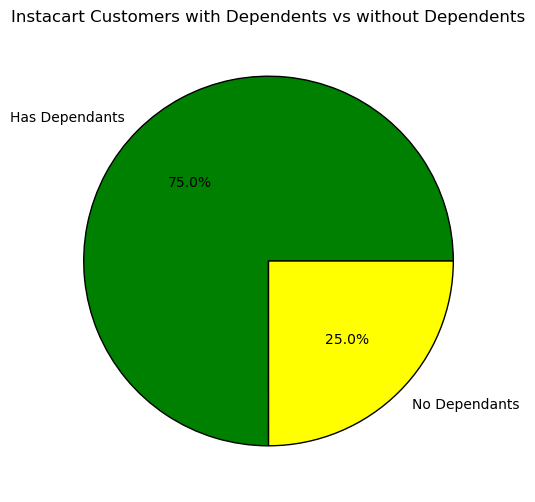

In [128]:
# Pie chart
plt.figure(figsize=(6, 6)),
plt.pie(dependants_flag_counts,
labels = dependants_flag_counts.index,
autopct='%.1f%%',
colors = ['green', 'yellow'],
wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependents vs without Dependents')

In [130]:
# export figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

Usage frequency is analyzed based on days since prior order & expenditure based on prices columns.
For accuracy, aggregate the data from the instacart DataFrame so that each row represents a single order.
This approach prevents averages from being skewed by customer orders comprising many items.

# step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [132]:
# An aggregated subset of data with 'prices' column as the total cost of each order
orders_subset = instacart_final.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [134]:
# max, min, mean by age category
agg_age = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

In [136]:
agg_age

days_since_prior_order                  prices              \
                               min       mean   max    min        mean   
age_group                                                                
Adult                          0.0  10.403753  30.0    1.0  119.309617   
Older Adult                    0.0  10.382166  30.0    1.0  122.515094   
Senior                         0.0  10.372165  30.0    1.0  117.902487   
Young Adult                    0.0  10.380577  30.0    1.0  123.717587   

                       
                  max  
age_group              
Adult        100384.5  
Older Adult  100452.9  
Senior       100330.2  
Young Adult  100265.6

In [138]:
# max, min, mean by age category
agg_income = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

In [140]:
agg_income

days_since_prior_order                  prices              \
                                min       mean   max    min        mean   
income_group                                                              
High                            0.0  10.260991  30.0    1.0  173.328575   
Low                             0.0  11.070341  30.0    1.0   52.673028   
Middle                          0.0  10.290003  30.0    1.0   87.647632   

                        
                   max  
income_group            
High          100452.9  
Low              875.0  
Middle        100264.7

In [142]:
# max, min, mean by dependents category
agg_dependants = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

In [144]:
agg_dependants

days_since_prior_order                  prices              \
                                   min       mean   max    min        mean   
dependants_flag                                                              
Has Dependants                     0.0  10.388225  30.0    1.0  120.027807   
No Dependants                      0.0  10.378169  30.0    1.0  121.866791   

                           
                      max  
dependants_flag            
Has Dependants   100452.9  
No Dependants    100384.5

Lower income customers spend less on average and shop very slightly less often\n",
All age groups tend to shop and spend with similar frequency
Whether or not a customer has dependents doesn't seem to make a substantial difference to shopping or spendings.

# step 8 : Compare customer profiles with regions and departments and identify any links

In [146]:
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [148]:
df_dept.head

<bound method NDFrame.head of     Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing>

In [162]:
#Rename column 'Unnamed: 0' to 'department_id'
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [164]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [170]:
instacart_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge', 'region', 'exclusion_flag',
       'age_group', 'income_group', 'dependants_flag'],
      dtype='object')

In [176]:
#Merging instacart dataset with department dataset
instacart_comb = instacart_final.merge(df_dept, on = 'department_id')

In [178]:
instacart_comb.shape

(30964564, 38)

In [182]:
instacart_comb.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group,income_group,dependants_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,both,Northeast,Keep,Senior,High,Has Dependants,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,2,married,57797,both,West,Keep,Older Adult,Middle,Has Dependants,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,3,living with parents and siblings,34171,both,South,Keep,Young Adult,Low,Has Dependants,snacks


In [184]:
# Exporting New Merged Dataframe
instacart_comb.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_combined.pkl'))

In [186]:
#Importing Merged Data
df_comb = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_combined.pkl'))

In [188]:
df_comb['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

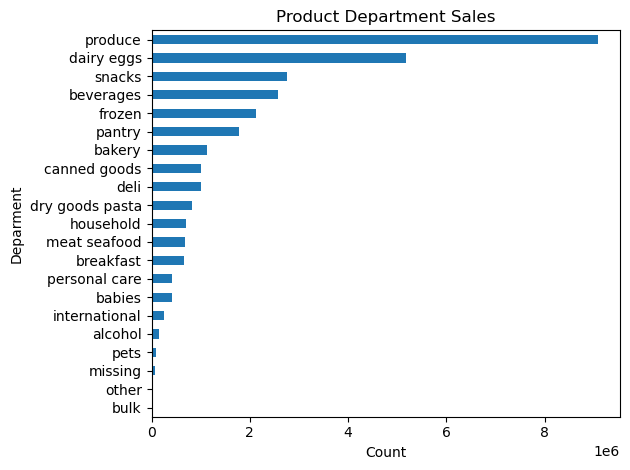

In [190]:
#Creating bar chart of Departments
dept_bar = df_comb['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [192]:
#Exporting Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','departments_product_bar.png'))

In [196]:
# Selecting relevant columns
user_sample = df_comb[['user_id','age_group','income_group','dependants_flag','region','loyalty_flag']]

In [198]:
user_sample = user_sample.drop_duplicates()

In [200]:
user_sample.shape

(162631, 6)

## 8.1 Customer Profile by regions
## Comparing age group with region

In [202]:
age_region_comparison = pd.crosstab(df_comb['age_group'],df_comb['region'],dropna = False)

In [204]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Adult,2172833,1602358,3092723,2346537
Older Adult,2286479,1697611,3194966,2510995
Senior,1904046,1484807,2708461,2098230
Young Adult,898155,679909,1314989,971465


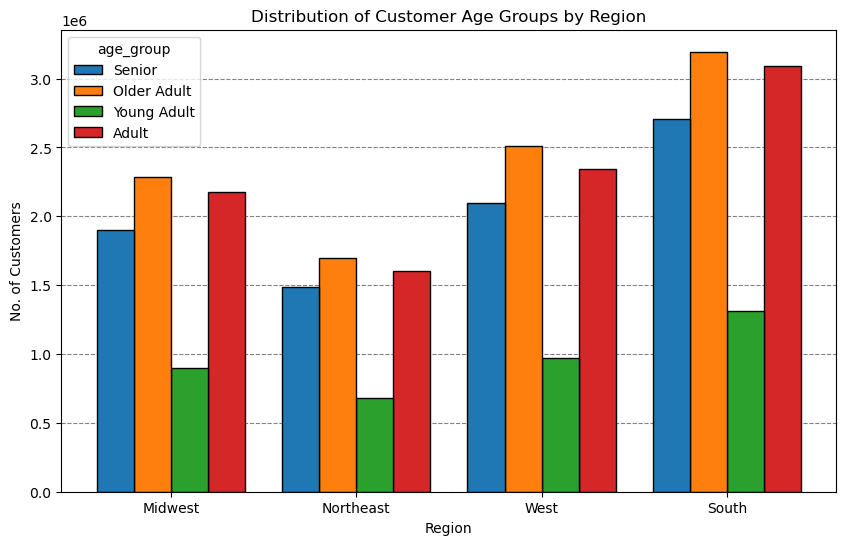

In [206]:
# Plotting Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df_comb, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

## Comparing income group with regions

In [208]:
income_region_comparison = pd.crosstab(df_comb['income_group'],df_comb['region'],dropna = False)

In [210]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High,3400093,2516484,4663571,3626880
Low,783764,587137,1142572,849081
Middle,3077656,2361064,4504996,3451266


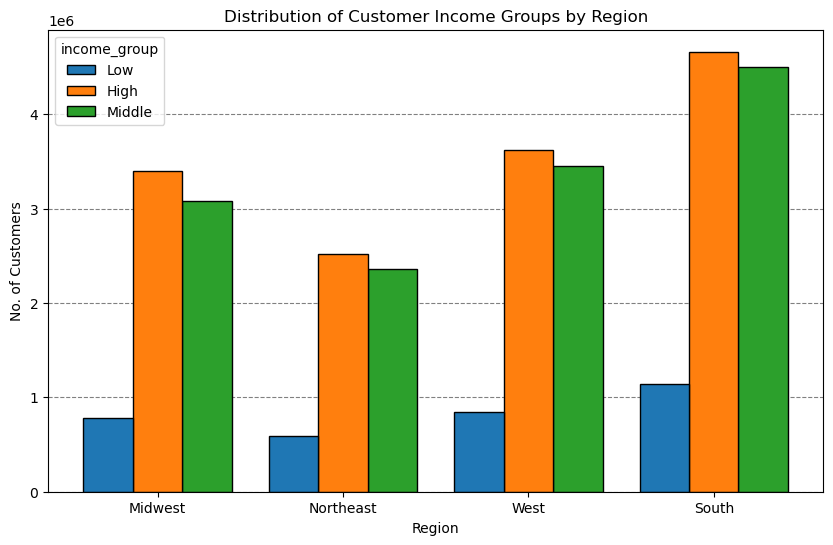

In [212]:
# Plotting Histogram for income group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=df_comb, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

### Compairing Departments and regions 

In [214]:
dept_region_comparison = pd.crosstab(df_comb['department'],df_comb['region'],dropna = False)

In [216]:
dept_region_comparison

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


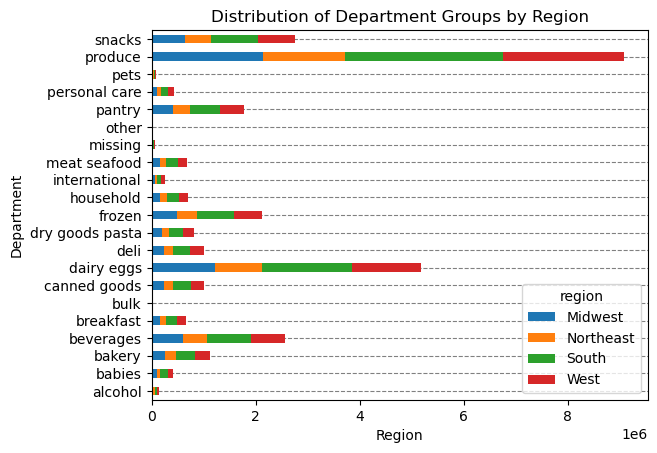

In [218]:
# Region_department Bar Chart

bar5 = dept_region_comparison.plot.barh(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Department')
plt.xlabel('Region')

# Exporting bar chart

bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_region_department.png'))

### Compairing dependents and regions

In [220]:
depend_region_comp  = pd.crosstab(df_comb['dependants_flag'],df_comb['region'],dropna = False)

In [222]:
depend_region_comp

region,Midwest,Northeast,South,West
dependants_flag,,,,
Has Dependants,5438697,4110203,7729206,5946777
No Dependants,1822816,1354482,2581933,1980450


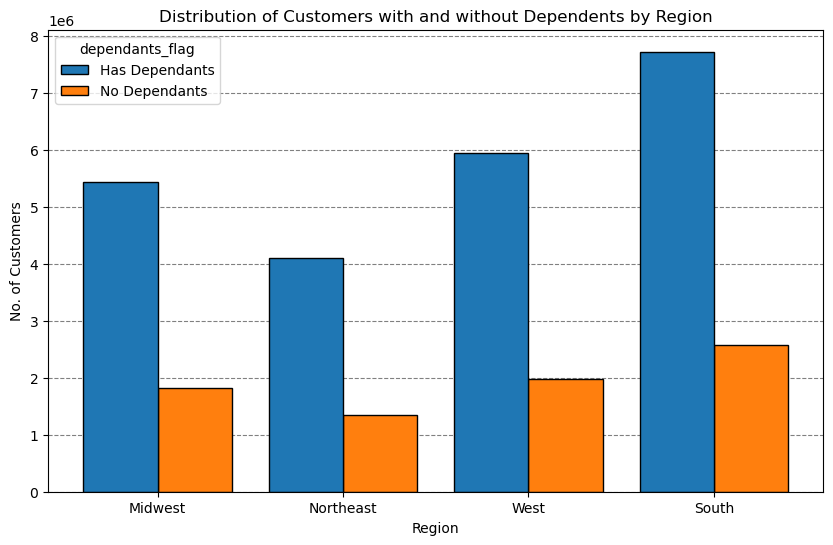

In [224]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=df_comb, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','instacart_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

In [226]:
fam_region_comp  = pd.crosstab(df_comb['marital_status'],df_comb['region'],dropna = False)
fam_region_comp

region,Midwest,Northeast,South,West
marital_status,,,,
divorced/widowed,617198,478767,877314,671992
living with parents and siblings,351435,256430,505457,367850
married,5087262,3853773,7223749,5578927
single,1205618,875715,1704619,1308458


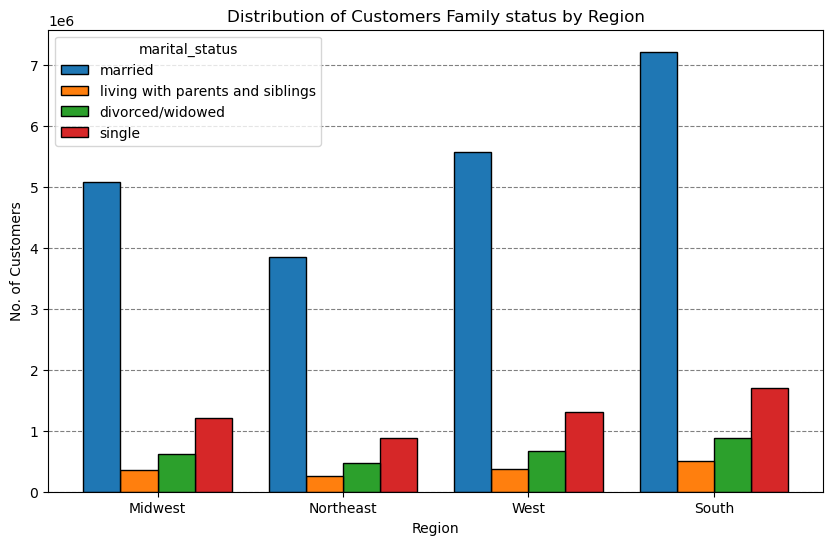

In [228]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=df_comb, x='region', hue='marital_status', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Family status by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_fam_by_region.png'), bbox_inches = 'tight')
plt.show()

## Customer profile by department sales
## Compairing age group and department

In [230]:
age_dept_comp  = pd.crosstab(df_comb['department'],df_comb['age_group'],dropna = False)

In [232]:
age_dept_comp

age_group,Adult,Older Adult,Senior,Young Adult
department,,,,
alcohol,42167,46579,36693,19188
babies,123044,129910,106204,51234
bakery,334154,350804,295997,139873
beverages,754851,814687,684020,318343
breakfast,198803,211274,175296,85477
bulk,9902,10298,8945,4306
canned goods,302479,315774,267509,126312
dairy eggs,1549127,1612490,1368072,647493
deli,299970,314110,265199,124555


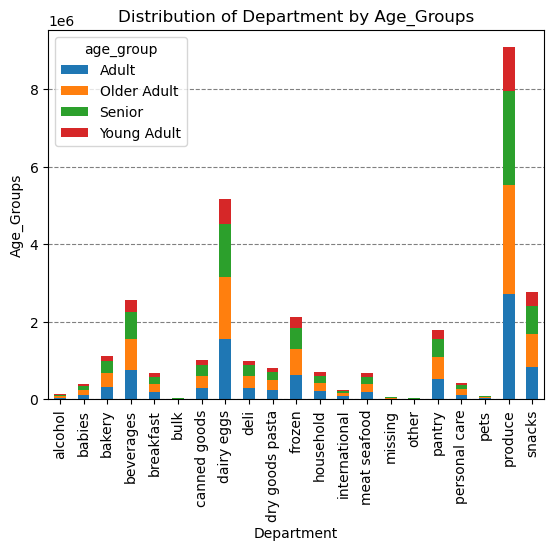

In [234]:
# Age Group_department Bar Chart

bar5 = age_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Age_Groups')
plt.xlabel('Department')
plt.ylabel('Age_Groups')

# Exporting bar chart

bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_gp_department.png'))

## Compairing income group with department

In [236]:
income_dept_comp  = pd.crosstab(df_comb['department'],df_comb['income_group'],dropna = False)

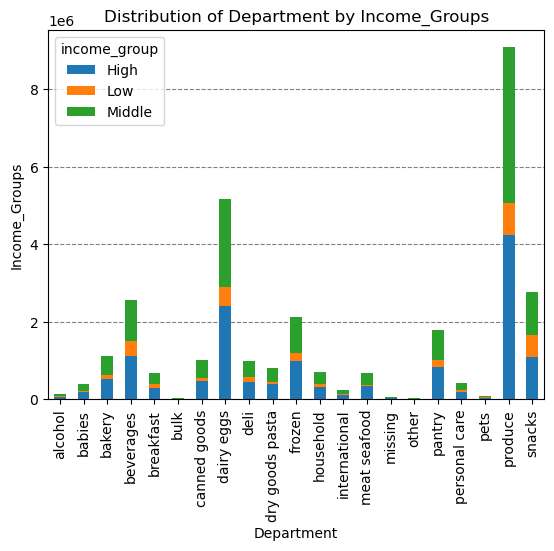

In [238]:
# Income Group_department Bar Chart

bar6 = income_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Income_Groups')
plt.xlabel('Department')
plt.ylabel('Income_Groups')

# Exporting bar chart

bar6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_gp_department.png'))

In [240]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = df_comb.groupby(['income_group', 'department']).size().reset_index(name='counts')

In [242]:
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

In [245]:
income_department_counts.head(50)

,income_group,department,counts
61,Middle,produce,4016038
49,Middle,dairy eggs,2268659
62,Middle,snacks,1102298
45,Middle,beverages,1062343
52,Middle,frozen,918102
58,Middle,pantry,776724
44,Middle,bakery,486368
48,Middle,canned goods,447873
50,Middle,deli,435297
51,Middle,dry goods pasta,364946


## Top 5 departments for all income groups, i.e Low, Middle and High Income Group are Produce, dairy eggs, snacks, beverages and frozen.

## Compairing dependent flag and department

In [249]:
depend_dept_comp  = pd.crosstab(df_comb['department'],df_comb['dependants_flag'],dropna = False)

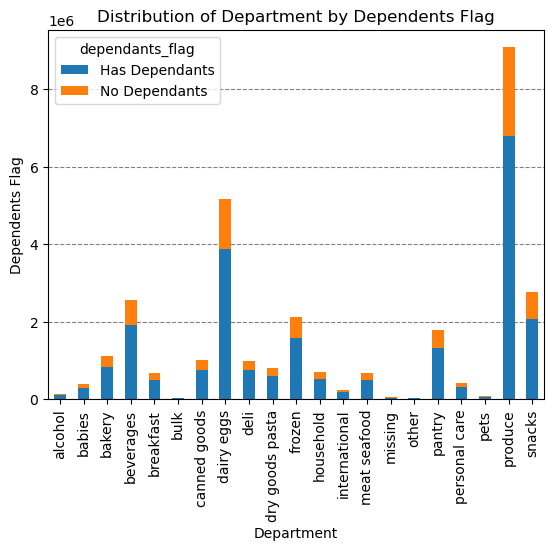

In [251]:
# Dependents Flag department Bar Chart

bar7 = depend_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Dependents Flag')
plt.xlabel('Department')
plt.ylabel('Dependents Flag')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_depnd_department.png'))

## customer profile by frequency
## income groups

In [255]:
income_freq = pd.crosstab(df_comb['income_group'],df_comb['frequency_flag'],dropna = False)

In [257]:
income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High,9779323,1290502,3137203
Low,2199082,376138,787334
Middle,9226071,1228335,2940576


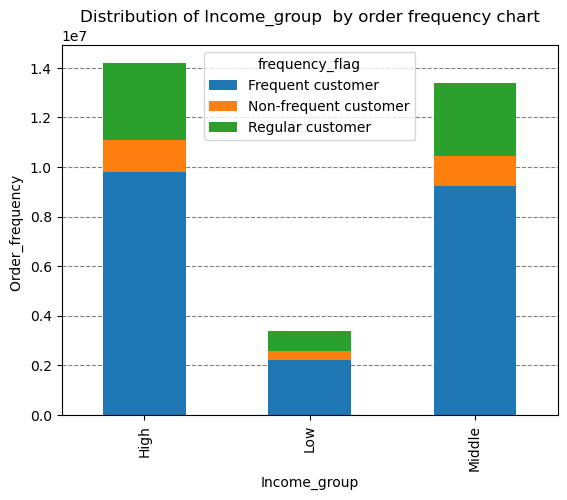

In [259]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_income_frequency.png'))

## Age group and frequency comparison

In [263]:
# Creating crosstab for age and frequency

age_freq = pd.crosstab(df_comb['age_group'], df_comb['frequency_flag'], dropna = False)
age_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,6309385,848176,2056890
Older Adult,6610186,928228,2151637
Senior,5630976,760132,1804436
Young Adult,2653929,358439,852150


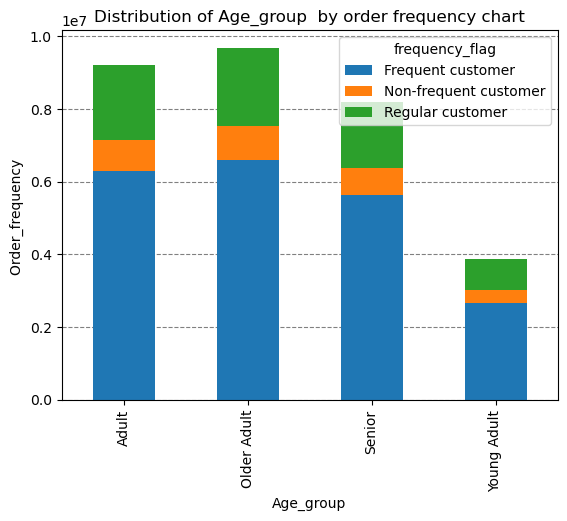

In [265]:
# Age Group and Order frequency Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Age_group')

# Exporting bar chart

bar8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_freq.png'))

## Marital status and frequency comparison

In [269]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(df_comb['marital_status'], df_comb['frequency_flag'], dropna = False)
marital_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


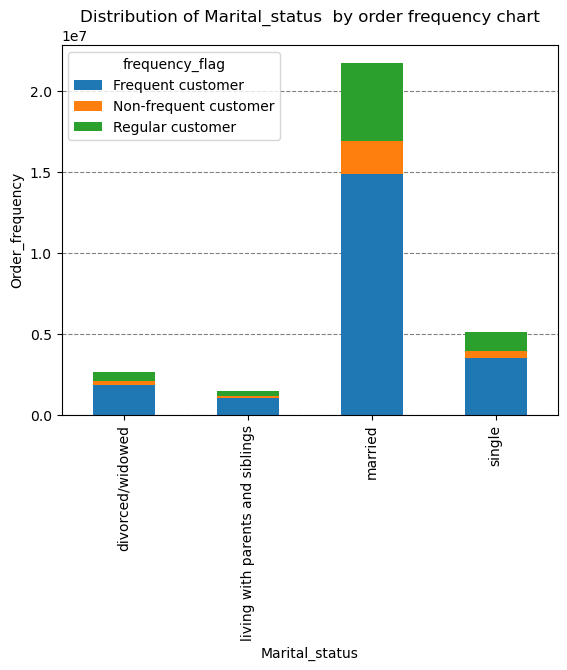

In [271]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency')
plt.xlabel('Marital_status')

# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_marital_freq.png'))

## Department and frequency comparison

In [273]:
# Creating crosstab for department and frequency
dep_freq = pd.crosstab(df_comb['department'], df_comb['frequency_flag'], dropna = False)
dep_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,100491,13271,30865
babies,316214,25297,68881
bakery,770435,103019,247374
beverages,1756158,244136,571607
breakfast,455837,64106,150907
bulk,25087,2514,5850
canned goods,658729,108011,245334
dairy eggs,3623889,452920,1100373
deli,674588,98098,231148


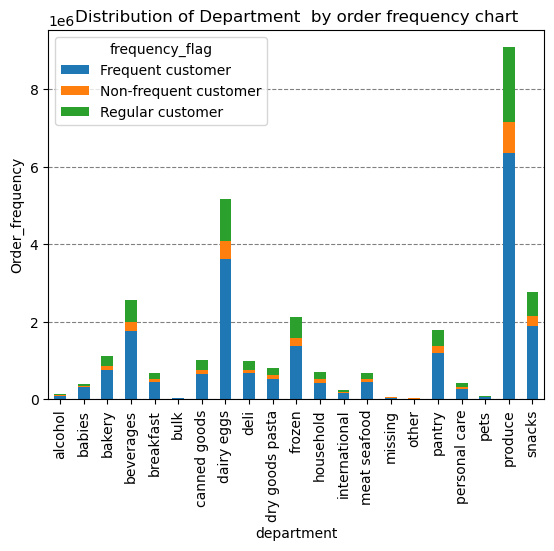

In [277]:
#dept_freq Bar Chart

bar9 = dep_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order_frequency')
plt.xlabel('department')

# Exporting bar chart
bar9.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_frequency.png'))

In [279]:
# Export final dataset
df_comb.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_final2.pkl'))

## Additional Visualizations

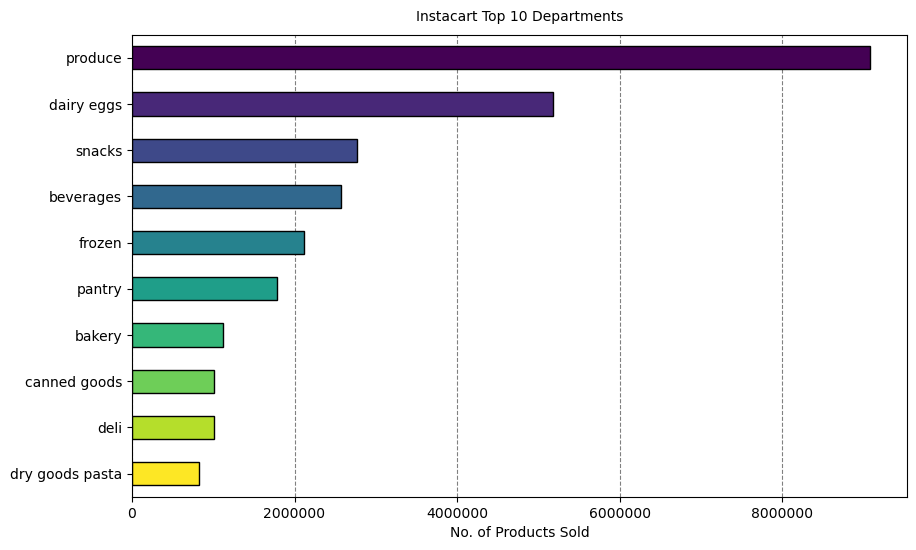

In [281]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

df_comb['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Instacart_department_sales.png'), bbox_inches = 'tight')


## Order Volume by Product Price Range and Customer Loyalty

In [283]:
# Grouping by Price Range
# Create a dataframe that contains the counts for each price_range for each loyaty group
loyalty_price_range = df_comb.groupby(['loyalty_flag', 'price_range_loc']).size().unstack(fill_value=0)
loyalty_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


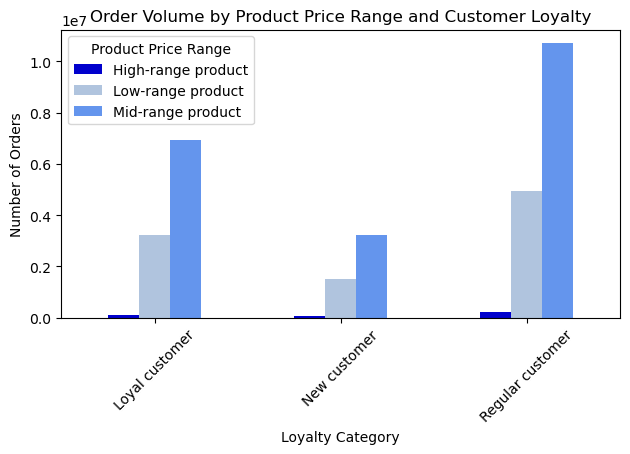

In [285]:
# Custom colors
colors = ['mediumblue', 'lightsteelblue', 'cornflowerblue']

# Plot the grouped bar chart
loyalty_price_range.plot(kind='bar', stacked=False, color=colors)
plt.title('Order Volume by Product Price Range and Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Product Price Range')
plt.tight_layout()
product_price_range_by_loyalty = plt.gcf()
product_price_range_by_loyalty.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_price_range_by_loyalty.png'), dpi=300, bbox_inches='tight')

### Ordering habit based on family status and age

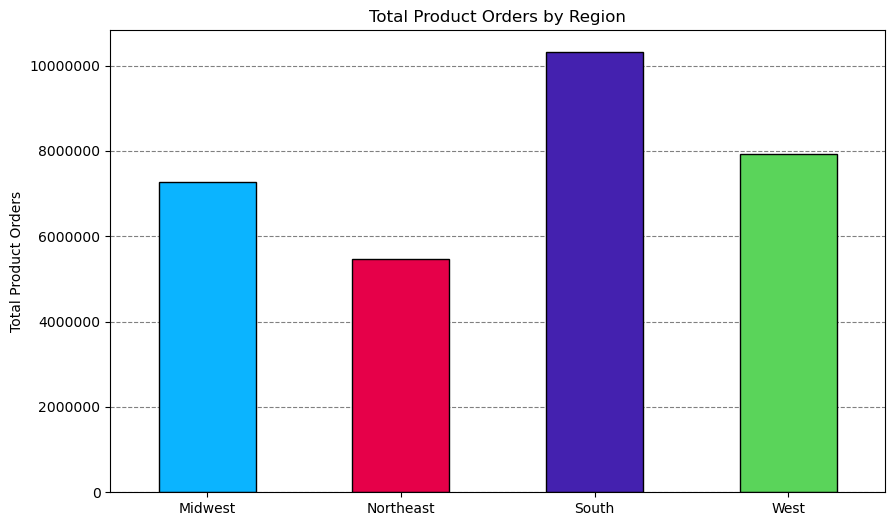

In [301]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
df_comb['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','instacart_total_orders_by_region.png'), bbox_inches = 'tight')